In [1]:
from google.colab import files
data_to_load = files.upload()

Saving datasets_727551_1263738_heart_failure_clinical_records_dataset.csv to datasets_727551_1263738_heart_failure_clinical_records_dataset (3).csv


In [2]:
#Machine Learning Algorithm(Decision Tree,Support Vector Machine,Random forest, XGBoost Classifier, Logistic Regression, KNN)
#Deep learning -> Artificial Nueral Networks(ANN)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os

In [4]:
df=pd.read_csv('datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')

In [5]:
df.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
#Data Visualization, Explotary Analysis & Data Pre-processing

In [7]:
df.head(n=10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


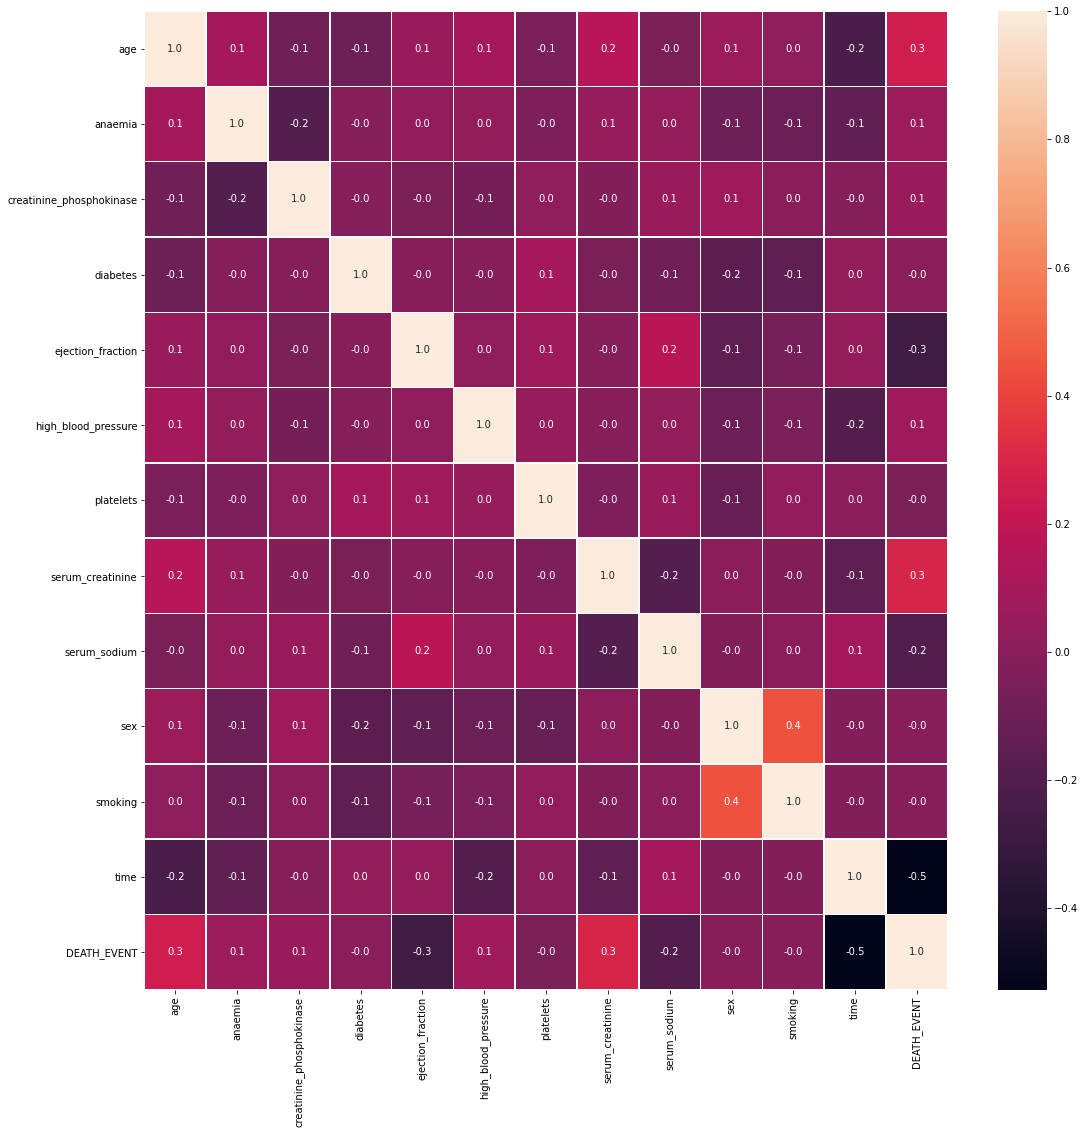

In [11]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5,fmt='.1f',ax=ax)

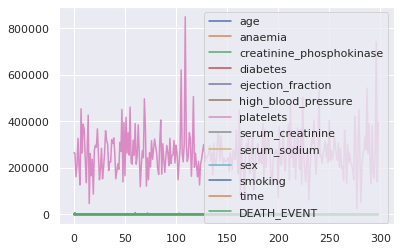

In [12]:
import seaborn; seaborn.set()
df.plot();

In [13]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


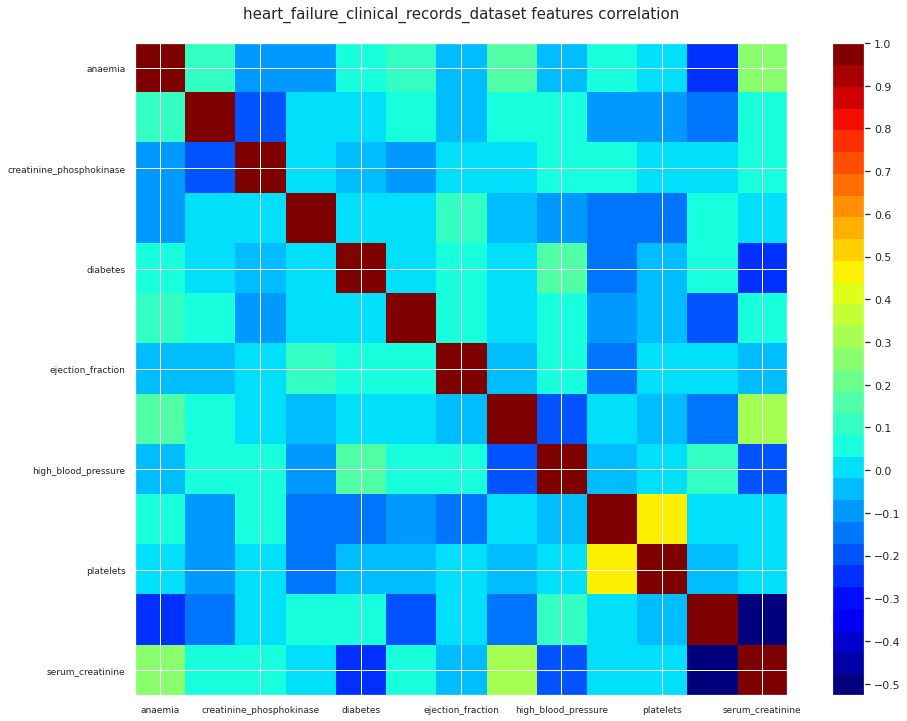

In [14]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('heart_failure_clinical_records_dataset features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

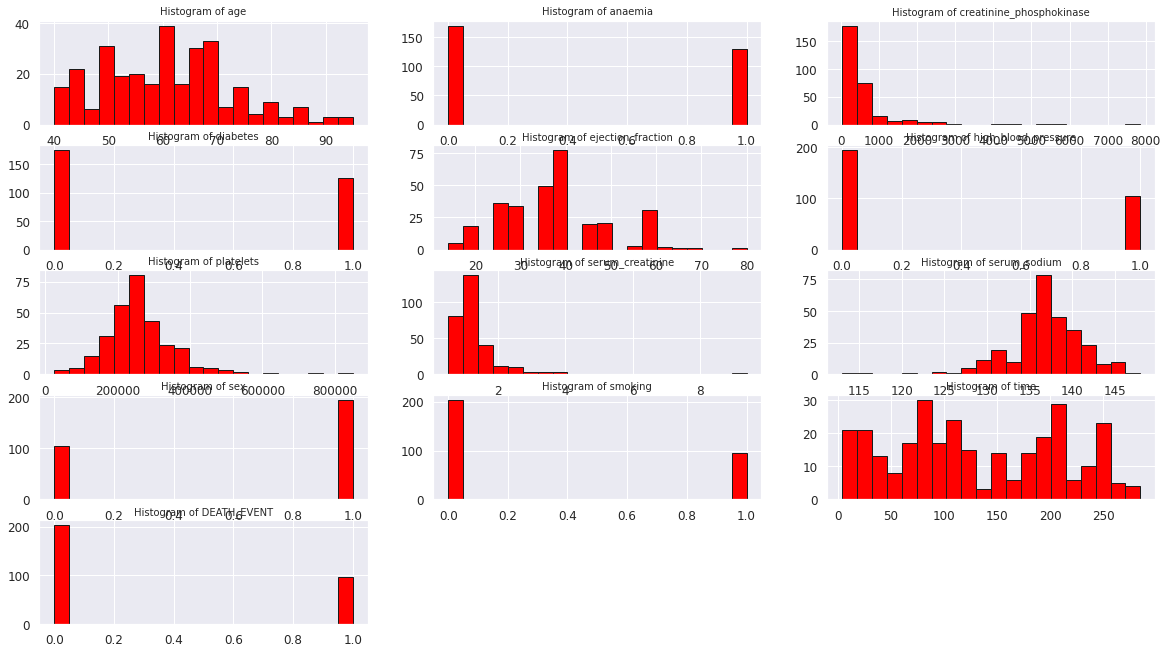

In [15]:
i=1
plt.figure(figsize=(20,18))
for c in df.describe().columns[:]:
    plt.subplot(8,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='red',edgecolor='k')
    i+=1
plt.show()

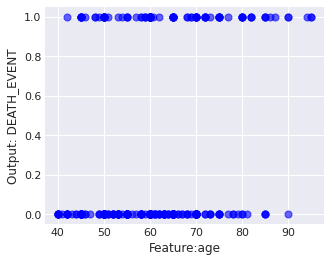

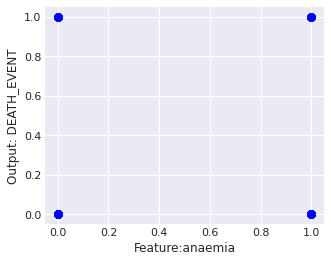

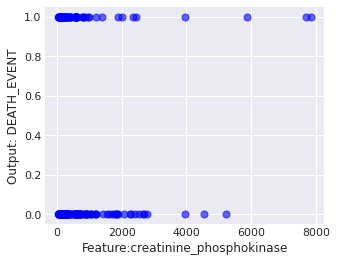

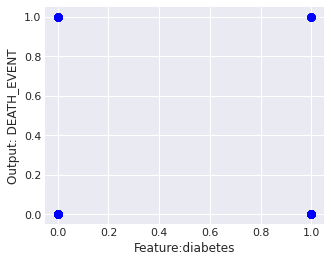

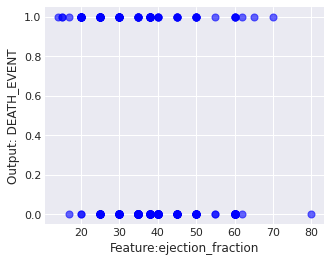

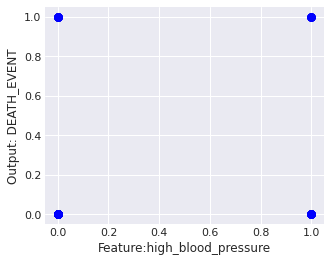

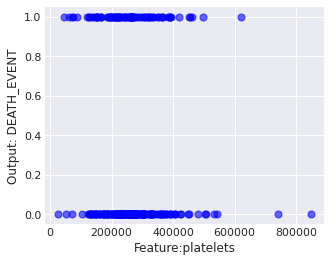

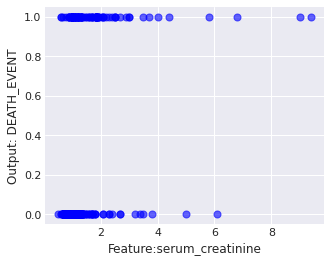

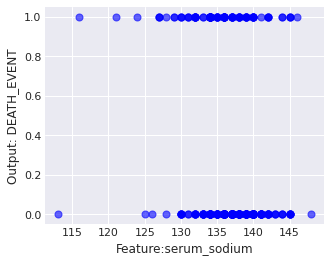

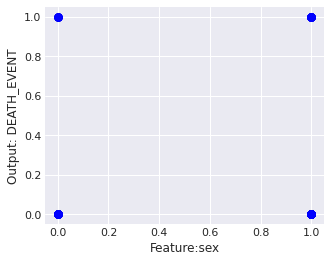

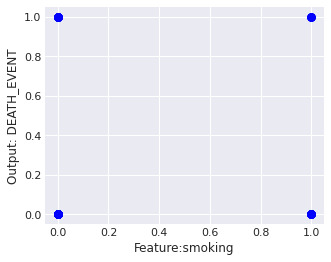

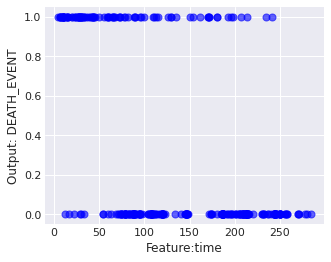

In [16]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(5,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: DEATH_EVENT',fontsize=12)
        plt.scatter(df[col],df['DEATH_EVENT'],c='blue',s=50,alpha=0.6)

In [17]:
df.apply(lambda x: sum(x.isnull()),axis=0)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

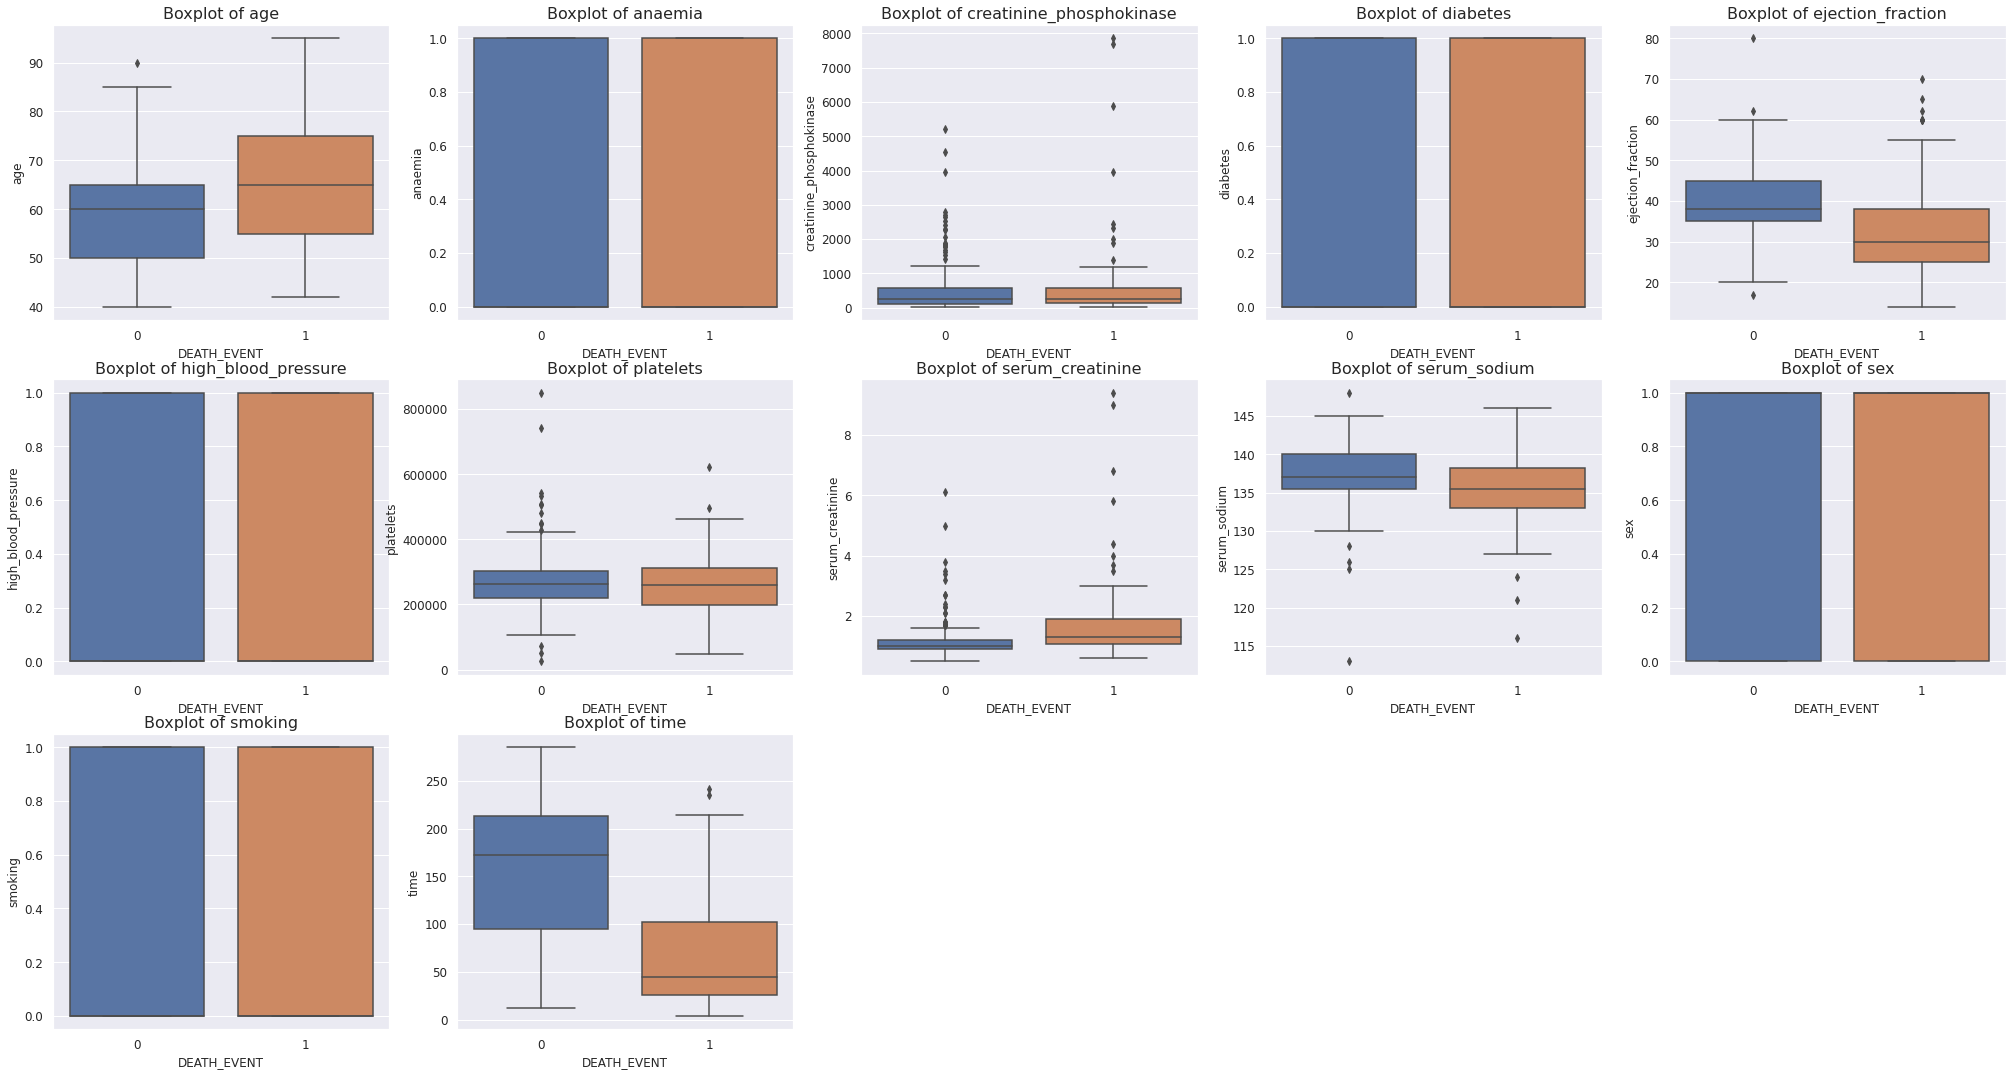

In [18]:
i=1
plt.figure(figsize=(35,25))
for c in df.columns[:-1]:
    plt.subplot(4,5,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['DEATH_EVENT'])
    i+=1
plt.show()

In [19]:
X_data=df.drop(['DEATH_EVENT'],axis=1)
y_data=df['DEATH_EVENT']



In [20]:
X_data.shape

(299, 12)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.33, random_state=0)

In [23]:
#Applied Algorithm or Method into Data  without scaling (standard scaler or min max)

In [24]:
dims = X_train.shape[1]
print(dims, 'dims')

12 dims


In [25]:
print(y_train)

18     1
280    0
248    0
126    1
171    0
      ..
251    0
192    0
117    0
47     1
172    0
Name: DEATH_EVENT, Length: 200, dtype: int64


In [26]:
#For Support vector Algorithm
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,predictions))

[[68  0]
 [31  0]]


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        68
           1       0.00      0.00      0.00        31

    accuracy                           0.69        99
   macro avg       0.34      0.50      0.41        99
weighted avg       0.47      0.69      0.56        99



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#Parameter tuning
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [32]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [33]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [34]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
grid_predictions = grid.predict(X_test)

In [36]:
print(confusion_matrix(y_test,grid_predictions))

[[60  8]
 [29  2]]


In [37]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        68
           1       0.20      0.06      0.10        31

    accuracy                           0.63        99
   macro avg       0.44      0.47      0.43        99
weighted avg       0.53      0.63      0.56        99



In [38]:
#Using DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=9)


In [39]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
predictions = dtree.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.74      0.55      0.63        31

    accuracy                           0.80        99
   macro avg       0.78      0.73      0.75        99
weighted avg       0.79      0.80      0.79        99



In [43]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[62  6]
 [14 17]]
Accuracy of prediction: 0.798


In [44]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [45]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rfc_pred = rfc.predict(X_test)

In [47]:
cr = classification_report(y_test,predictions)

In [48]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.74      0.55      0.63        31

    accuracy                           0.80        99
   macro avg       0.78      0.73      0.75        99
weighted avg       0.79      0.80      0.79        99



In [49]:
#Using XGBboost Classifier

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [53]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.84%


In [54]:
#Models performance Analysis with scaling(standard Scaler)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
list_models=[]
list_scores=[]
x_train=sc.fit_transform(X_train)
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
pred_1=lr.predict(sc.transform(X_test))
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('LogisticRegression')

In [56]:
score_1

0.6666666666666666

In [57]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(X_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)
    

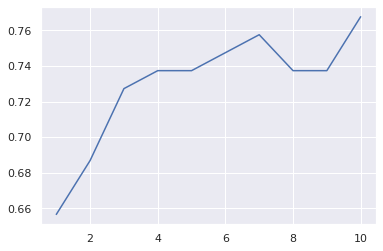

In [58]:
sns.lineplot(x=list(range(1,11)),y=list_1)

In [59]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')

In [60]:
print(max(list_1))

0.7676767676767676


In [61]:
#2nd method for Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(X_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

In [63]:
score_2

0.8888888888888888

In [64]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(X_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [65]:
score_3

0.8282828282828283

In [66]:
#2nd method for XGB

In [67]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(X_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [68]:
score_4

0.8383838383838383

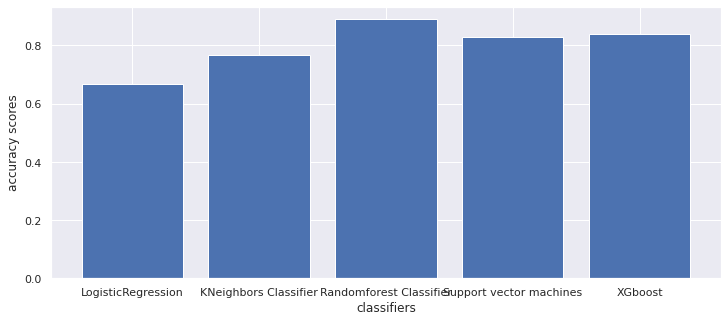

In [69]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()

In [70]:
#Artificial Neural Networks

In [71]:
import keras
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
X = df.iloc[:, 1:12].values
y = df.iloc[:, 12].values
X

array([[0.000e+00, 5.820e+02, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [0.000e+00, 7.861e+03, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [0.000e+00, 1.460e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [0.000e+00, 2.060e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [0.000e+00, 2.413e+03, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [0.000e+00, 1.960e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [73]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
#Deep Learning Baseline Model-Using Buildin Function

In [87]:
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(64, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [88]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=20, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/20
40/40 [==============================] - 0s 1ms/step - loss: 38.3479 - accuracy: 0.5578
Epoch 2/20
40/40 [==============================] - 0s 1ms/step - loss: 14.3777 - accuracy: 0.5176
Epoch 3/20
40/40 [==============================] - 0s 1ms/step - loss: 12.6095 - accuracy: 0.5678
Epoch 4/20
40/40 [==============================] - 0s 1ms/step - loss: 17.8334 - accuracy: 0.5829
Epoch 5/20
40/40 [==============================] - 0s 1ms/step - loss: 9.7146 - accuracy: 0.5628
Epoch 6/20
40/40 [==============================] - 0s 1ms/step - loss: 3.2884 - accuracy: 0.6181
Epoch 7/20
40/40 [==============================] - 0s 1ms/step - loss: 9.3323 - accuracy: 0.5779
Epoch 8/20
40/40 [==============================] - 0s 1ms/step - loss: 4.6379 - accuracy: 0.5528 
Epoch 9/20
40/40 [==============================] - 0s 1ms/step - loss: 10.3713 - accuracy: 0.5980
Epoch 10/20
40/40 [==============================] - 0s 1ms/step - loss: 6.8564 - accuracy: 0.5477
Epoch 11/20
4

In [77]:
#Deep Learning Model-Using Sequential Module

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=seed)

In [102]:
#Initializing Artificial Neural Network
model = Sequential()

#Adding input layer
model.add(Dense(100, input_dim=11, kernel_initializer='normal', activation='relu'))

# Adding the second hidden layer
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))

# Adding the Third hidden layer
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling Neural Network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_32 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 51        
Total params: 8,851
Trainable params: 8,851
Non-trainable params: 0
_________________________________________________________________


In [104]:
#fitting the neural Network

model.fit(X_train, y_train, batch_size = 5, epochs = 20,verbose=1)

Epoch 1/20
51/51 [==============================] - 0s 1ms/step - loss: 4.1410 - accuracy: 0.5000
Epoch 2/20
51/51 [==============================] - 0s 1ms/step - loss: 1.0910 - accuracy: 0.5433
Epoch 3/20
51/51 [==============================] - 0s 1ms/step - loss: 1.0141 - accuracy: 0.5472
Epoch 4/20
51/51 [==============================] - 0s 1ms/step - loss: 0.9484 - accuracy: 0.5709
Epoch 5/20
51/51 [==============================] - 0s 1ms/step - loss: 0.7129 - accuracy: 0.6339
Epoch 6/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6378
Epoch 7/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5945
Epoch 8/20
51/51 [==============================] - 0s 1ms/step - loss: 0.8516 - accuracy: 0.5276
Epoch 9/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6535
Epoch 10/20
51/51 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.6535
Epoch 11/20
51/51 [

In [105]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: ', score[1]*100)
print( 'loss:', score[0]*100)

2/2 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.8222
Accuracy:  82.22222328186035
loss: 65.203857421875


In [106]:
#Prevent overfitting

In [107]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [108]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.15, random_state=seed)

fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=50, 
          batch_size=32, verbose=True, callbacks=[best_model, early_stop])

Epoch 1/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6746 - accuracy: 0.6535 - val_loss: 0.6513 - val_accuracy: 0.8222
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.6535 - val_loss: 0.6504 - val_accuracy: 0.8222
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6739 - accuracy: 0.6535 - val_loss: 0.6492 - val_accuracy: 0.8222
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6734 - accuracy: 0.6535 - val_loss: 0.6481 - val_accuracy: 0.8222
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6729 - accuracy: 0.6535 - val_loss: 0.6470 - val_accuracy: 0.8222
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6725 - accuracy: 0.6535 - val_loss: 0.6458 - val_accuracy: 0.8222
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6720 - accuracy: 0.6535 - val_loss: 0.6447 - val_accuracy: 0.8222
Epoch 8/50
8/8 [=================

In [109]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: ', score[1]*100)
print( 'loss:', score[0]*100)

2/2 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.8222
Accuracy:  82.22222328186035
loss: 60.34988760948181
